In [1]:
import os
import cv2
import numpy as np
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Activation,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras import utils

In [2]:
train_data_path=r'C:\Users\HP\Downloads\archive8\train'
test_data_path=r'C:\Users\HP\Downloads\archive8\test'

In [3]:
categories=os.listdir(train_data_path)

In [4]:
label=[i for i in range(0,len(categories))]

In [5]:
label_dict=dict(zip(categories,label))

In [6]:
label_dict

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [7]:
image_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(train_data_path,category)
    image_names=os.listdir(folder_path)
    for image_name in image_names:
        img_path=os.path.join(folder_path,image_name)
        img=cv2.imread(img_path)
        try:
            grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(grey,(image_size,image_size))
            data.append(resized)
            target.append(label_dict[category])
        except:
            print('Exception',e)

for category in categories:
    folder_path=os.path.join(test_data_path,category)
    image_names=os.listdir(folder_path)
    for image_name in image_names:
        img_path=os.path.join(folder_path,image_name)
        img=cv2.imread(img_path)
        try:
            grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(grey,(image_size,image_size))
            data.append(resized)
            target.append(label_dict[category])
        except:
            print('Exception',e)

In [8]:
x=np.array(data)
y=np.array(target)

In [9]:
x.shape

(35887, 100, 100)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
emotion=['angry','disgust','fear','happy','neutral','sad','surprise']

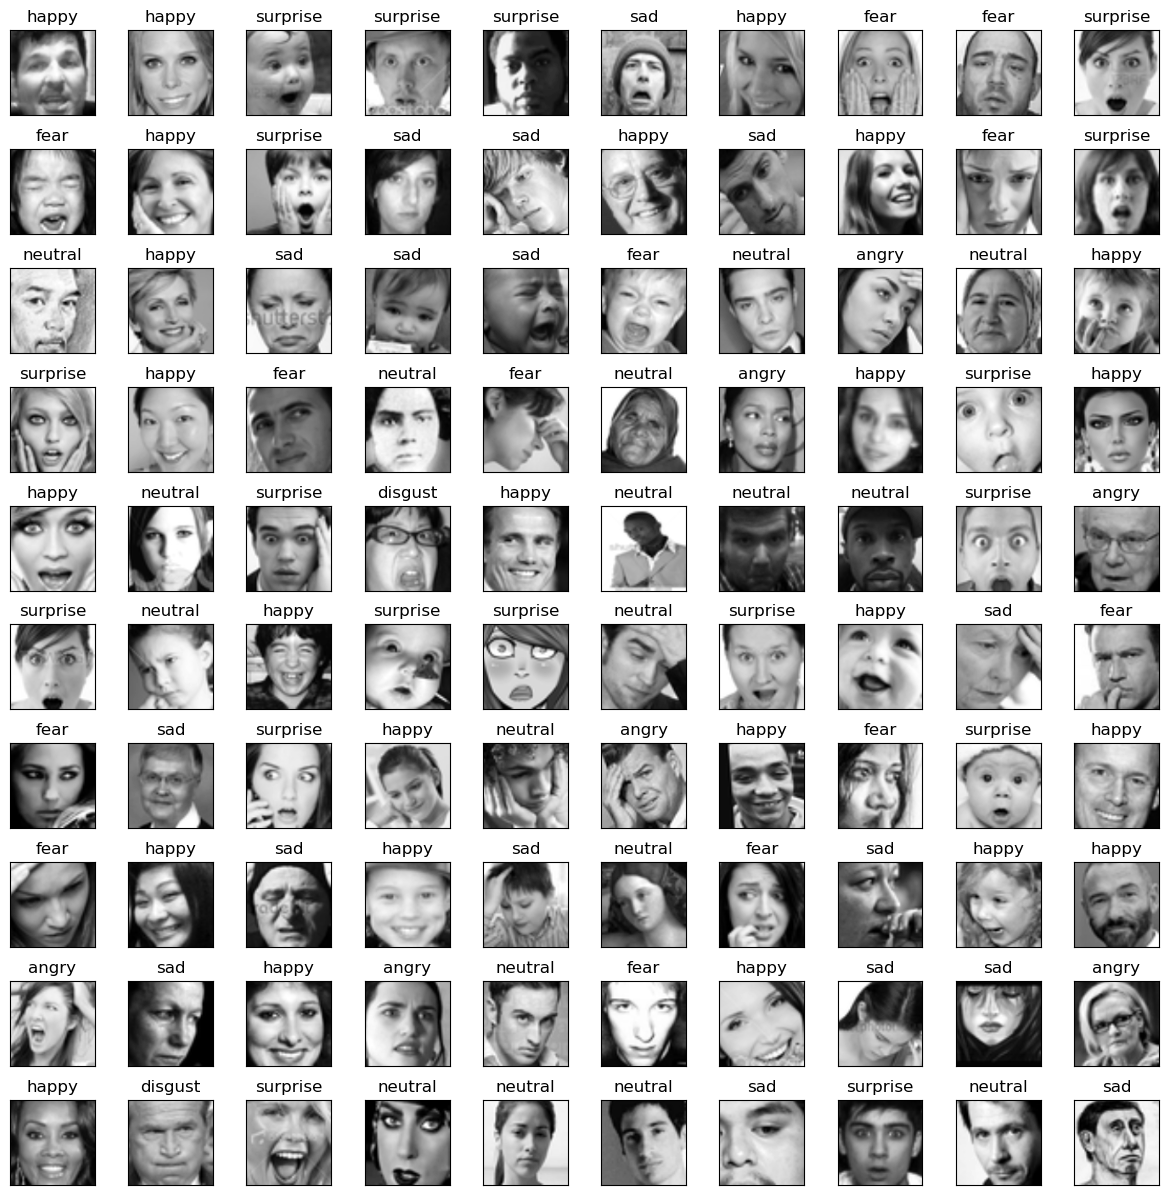

In [13]:
import matplotlib.pyplot as plt

fig =plt.figure(figsize = (15,15))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1,xticks = [],yticks = [])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'gray')
    ax.set_title(emotion[int(y_train[i])])
plt.subplots_adjust(hspace=0.4)

In [14]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [15]:
y_train

array([3, 3, 6, ..., 4, 4, 5])

In [16]:
y_train = utils.to_categorical(y_train, 7)
y_test = utils.to_categorical(y_test, 7)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [18]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=56, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=56, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=112, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=112, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(112, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

METRICS = ['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 28)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 100, 28)        │             112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 28)        │           7,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 100, 28)        │             112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 56)          │          14,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50, 50, 56)          │             224 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 56)          │          28,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 50, 50, 56)          │             224 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 56)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25, 25, 56)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 25, 25, 112)         │          56,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 25, 25, 112)         │             448 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 25, 25, 112)         │         113,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 25, 25, 112)         │             448 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 112)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 112)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,028,187 (7.74 MB)

 Trainable params: 2,027,403 (7.73 MB)

 Non-trainable params: 784 (3.06 KB)

In [20]:
checkpoint = ModelCheckpoint('emotion-{epoch:03d}.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='auto')
history = model.fit(x_train, y_train, epochs=75, validation_data=(x_test,y_test), callbacks=[checkpoint])

Epoch 1/75
898/898 ━━━━━━━━━━━━━━━━━━━━ 1297s 1s/step - accuracy: 0.2445 - loss: 2.6261 - precision: 0.3356 - recall: 0.0398 - val_accuracy: 0.3323 - val_loss: 1.6845 - val_precision: 0.8309 - val_recall: 0.0315
Epoch 2/75
898/898 ━━━━━━━━━━━━━━━━━━━━ 1251s 1s/step - accuracy: 0.3467 - loss: 1.6059 - precision: 0.7172 - recall: 0.1352 - val_accuracy: 0.4420 - val_loss: 1.4252 - val_precision: 0.8142 - val_recall: 0.1886
Epoch 3/75
898/898 ━━━━━━━━━━━━━━━━━━━━ 1327s 1s/step - accuracy: 0.3929 - loss: 1.5014 - precision: 0.7766 - recall: 0.1874 - val_accuracy: 0.4238 - val_loss: 1.3960 - val_precision: 0.8204 - val_recall: 0.2049
Epoch 4/75
898/898 ━━━━━━━━━━━━━━━━━━━━ 1201s 1s/step - accuracy: 0.4092 - loss: 1.4568 - precision: 0.7881 - recall: 0.2054 - val_accuracy: 0.3394 - val_loss: 1.6470 - val_precision: 0.8339 - val_recall: 0.0651
Epoch 5/75
898/898 ━━━━━━━━━━━━━━━━━━━━ 1154s 1s/step - accuracy: 0.4311 - loss: 1.4208 - precision: 0.7951 - recall: 0.2289 - val_accuracy: 0.4728 - va